# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [ ]:
!pip install seaborn

## This cell automatically downloads Capital Bikeshare data

In [ ]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')

### And here we read in the data

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [171]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

In [172]:
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour_of_day
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,23.98
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,23.95
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,23.95


### Aggregate to get a count per hour/minute of the day across all trips

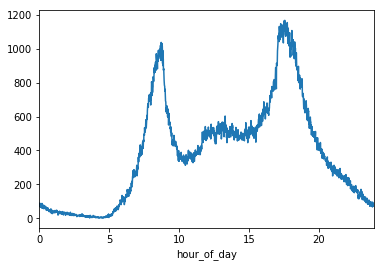

In [173]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
#import seaborn as sns

#sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

In [174]:
hours.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour
hour_of_day,,,,,,,,,,,,
0.00,70,70,70,70,70,70,70,70,70,70,70,0.00
0.02,90,90,90,90,90,90,90,90,90,90,90,0.02
0.03,71,71,71,71,71,71,71,71,71,71,71,0.03
0.05,77,77,77,77,77,77,77,77,77,77,77,0.05
0.07,68,68,68,68,68,68,68,68,68,68,68,0.07


# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

In [208]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

x = hours[['hour']]
y = hours['start']

linear.fit(x, y)
linear.coef_, linear.intercept_
x.shape

(1440, 1)

In [200]:
from sklearn.preprocessing import PolynomialFeatures

poly5 = PolynomialFeatures(degree=5)
poly10 = PolynomialFeatures(degree=10)
poly20 = PolynomialFeatures(degree=20)

x_5 = poly5.fit_transform(x)
x_10 = poly10.fit_transform(x)
x_20 = poly20.fit_transform(x)


In [201]:
linreg = linear_model.LinearRegression()
linreg.fit(x_5, y)

linreg2 = linear_model.LinearRegression()
linreg2.fit(x_10,y)

linreg3 = linear_model.LinearRegression()
linreg3.fit(x_20,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'count')

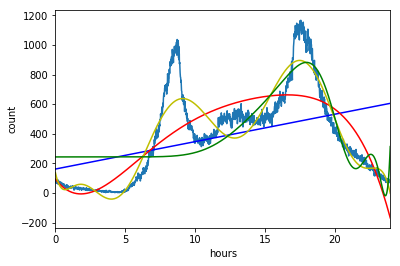

In [209]:
# hours['pred'] = linear.predict(x)

hours.start.plot()
plt.plot(x, np.dot(x, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_5, linreg.coef_) + linreg.intercept_, c='r')
plt.plot(x, np.dot(x_10, linreg2.coef_) + linreg2.intercept_, c='y')
plt.plot(x, np.dot(x_20, linreg3.coef_) + linreg3.intercept_, c='g')

plt.xlabel('hours')
plt.ylabel('count')

I would choose the x^10 model because it fits the best out of the other models.

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


In [212]:
ridge = linear_model.Ridge(alpha=100)
ridge.fit(x_10, y)

ridge2 = linear_model.Ridge(alpha=50)
ridge2.fit(x_10, y)

ridge3 = linear_model.Ridge(alpha=-50)
ridge3.fit(x_10, y)

Ridge(alpha=-50, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

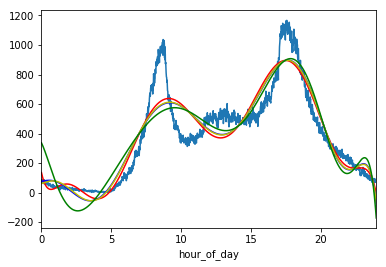

In [213]:
hours.start.plot()
plt.plot(x, np.dot(x_10, linreg2.coef_) + linreg2.intercept_, c='r')
plt.plot(x, np.dot(x_10, ridge.coef_) + ridge.intercept_, c='b')
plt.plot(x, np.dot(x_10, ridge2.coef_) + ridge2.intercept_, c='y')
plt.plot(x, np.dot(x_10, ridge3.coef_) + ridge3.intercept_, c='g')

It looks like the different ridge regression alphas did not improve the original x^10 model so I would recommend not using Ridge Regression.